# ***Car Sales Price Prediction***

## Understanding the Problem & Dataset
*Perform EDA and derive Insights from the CAR DETAILS dataset using Various Data Analysis and Data Visualization libraries of Python such as Pandas, Matplotlib & Seaborn. Create and Deploy a ML Model Which can be accessed by all,using Streamlit and GitHub.*

**About Dataset :**  
*This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.*

*The columns in the given dataset are as follows:*
- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

### Questions
 - Explore the Data using Excel . understand the data and prepare a short summary about the dataset in the PPT.
 - Download the CAR DETAILS dataset and perform Data cleaning and Data Pre-Processing if Necessary.
 - Use the various methods such as Handling null values, One-Hot Encoding, Imputation and Scaling of Data Pre-Processing where necessary.
 - Perform Exploratory data analysis (EDA) on the Data and perform Graphical Analysis on the Data. Include the graphs with conclusions from the Graphical Analysis.
 - Prepare the Data for Machine Learning modeling.
 - Apply various Machine Learning techniques such as Regression or classification ,Bagging, Ensemble techniques and find out the best model using various Machine Learning model evaluation metrics.
 - Save the best model and Load the model.
 - Take the original data set and make another dataset by randomly picking 20 data points from the CAR DETAILS dataset and apply the saved model on the same Dataset and test the model.
 - Make a GitHub Account by visiting the GitHub Website. Create a repository named Data Science Capstone Project and upload the model with the dataset, code file.
 - Create a Streamlit Account by visiting the Streamlit Website. Connect your GitHub account with streamlit.
 - Create an app.py file and other dependencies files for Streamlit app to be deployed on Streamlit Cloud. Make a simple website and deploy your ML model on Streamlit, Make the website public.
 - Share the Streamlit website and GitHub repository links in the Project PPT.

# Data Cleaning & Analysis

#### Import necessary library

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.metrics import *

import warnings 
warnings.filterwarnings('ignore')

#### Loading and Understanding the dataset

In [2]:
df = pd.read_csv(r"C:\Users\shubh\Downloads\2\CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# To print the sample rows of the df
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3385,Hyundai i20 Magna Optional 1.4 CRDi,2012,350000,80000,Diesel,Individual,Manual,First Owner
3422,Maruti Alto 800 VXI,2020,210000,40000,Petrol,Individual,Manual,First Owner
328,Hyundai i20 1.2 Spotz,2017,575000,20000,Petrol,Individual,Manual,Second Owner
1514,Skoda Rapid 1.6 TDI Elegance,2012,275000,120000,Diesel,Individual,Manual,Second Owner
4108,Mahindra Bolero Power Plus Plus AC BSIV PS,2015,295000,90000,Diesel,Individual,Manual,Third Owner
3692,Toyota Fortuner 3.0 Diesel,2012,1680000,129627,Diesel,Dealer,Manual,First Owner
4181,Maruti Swift VDI,2007,225000,50000,Diesel,Dealer,Manual,First Owner
367,Mahindra XUV500 W6 2WD,2012,550000,80000,Diesel,Individual,Manual,First Owner
3492,Skoda Laura Elegance 2.0 TDI CR AT,2019,475000,105000,Diesel,Dealer,Automatic,First Owner
1724,Toyota Innova 2.5 V Diesel 8-seater,2008,500000,154000,Diesel,Individual,Manual,Third Owner


In [4]:
# Checking the shape of data
df.shape

(4340, 8)

In [5]:
# To print the concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Data Cleaning and Manipulation

In [6]:
# Checking for the null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
# To generate descriptive statistics of the df
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
# To find wethere there are any duplicate values in the df
df.duplicated().sum()

np.int64(763)

In [9]:
#To drop duplicate values
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(3577, 8)

In [11]:
#To get information about the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [12]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

Numerical Columns:
Index(['year', 'selling_price', 'km_driven'], dtype='object')


#### Adjusting Column Names

In [13]:
#To print all the unique values in the "name" columns of the df
df["name"].unique(),df["name"].nunique()

(array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
        'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
        'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
        'Hyundai i20 Magna 1.4 CRDi'], dtype=object),
 1491)

**Extracting two new columns, 'brand' and 'model', from the 'name' column.**

In [14]:
#creating two new column in the dataframe
df[['brand', 'model']] = df['name'].str.split(n=1, expand=True)

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [16]:
#removing name column
df.drop('name',axis=1,inplace=True)

In [17]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [18]:
#changing column order 
new_order=['brand','model','year','km_driven','fuel','seller_type','transmission','owner','selling_price']
df = df.reindex(columns=new_order)

In [19]:
df.head()

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [20]:
df['brand'].value_counts()

brand
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Mitsubishi          5
Jaguar              5
Land                5
Volvo               4
Jeep                3
Ambassador          3
OpelCorsa           2
MG                  2
Force               1
Daewoo              1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [21]:
# Calculate value counts of 'brand'
brand_counts = df['brand'].value_counts()

# Create a new column for grouping brands with less than 50 counts as 'Other'
df['brand'] = df['brand'].apply(lambda x: x if brand_counts[x] >= 40 else 'Other')

df['brand'].value_counts()

brand
Maruti        1072
Hyundai        637
Mahindra       328
Tata           308
Ford           220
Honda          216
Other          171
Toyota         170
Chevrolet      151
Renault        110
Volkswagen      93
Nissan          52
Skoda           49
Name: count, dtype: int64

**In the 'brand' column, combine brands with fewer than 40 occurrences into a new category called 'Others'.**

## Data Visualization

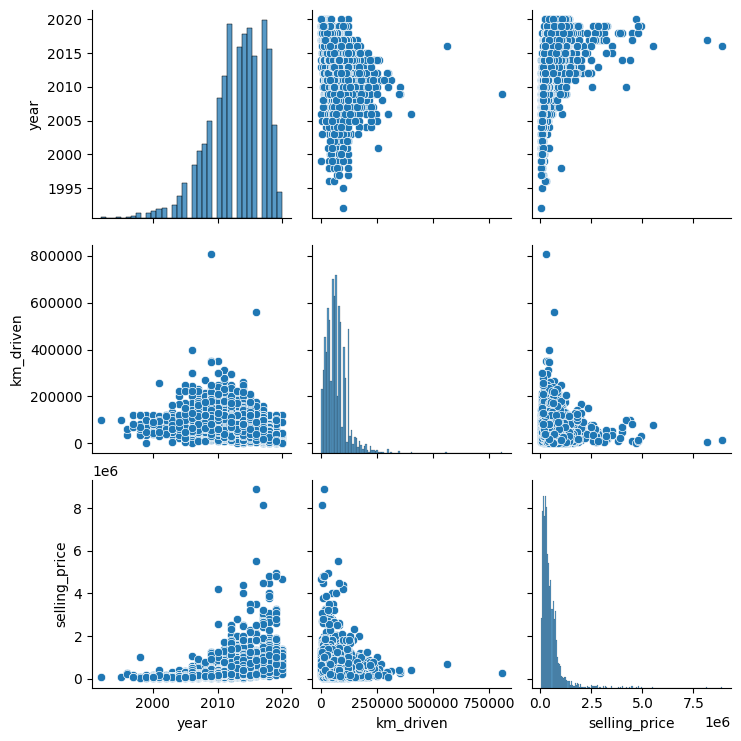

In [22]:
# To visualize the pairplot of the df
sns.pairplot(df)
plt.show()

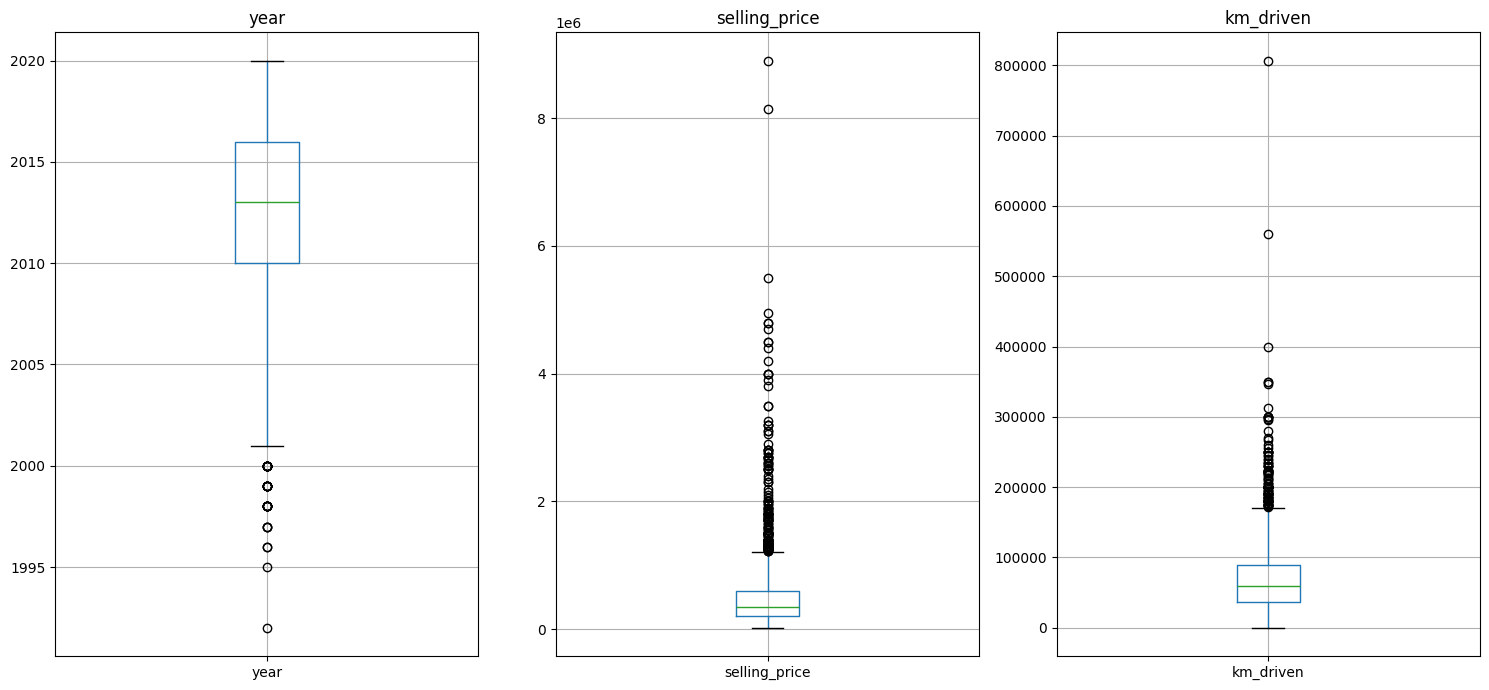

In [23]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 7))

# Create a boxplot for each numerical column
for i, column in enumerate(numerical_columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

**The 'year', 'selling price', and 'km driven' columns contain outliers.**

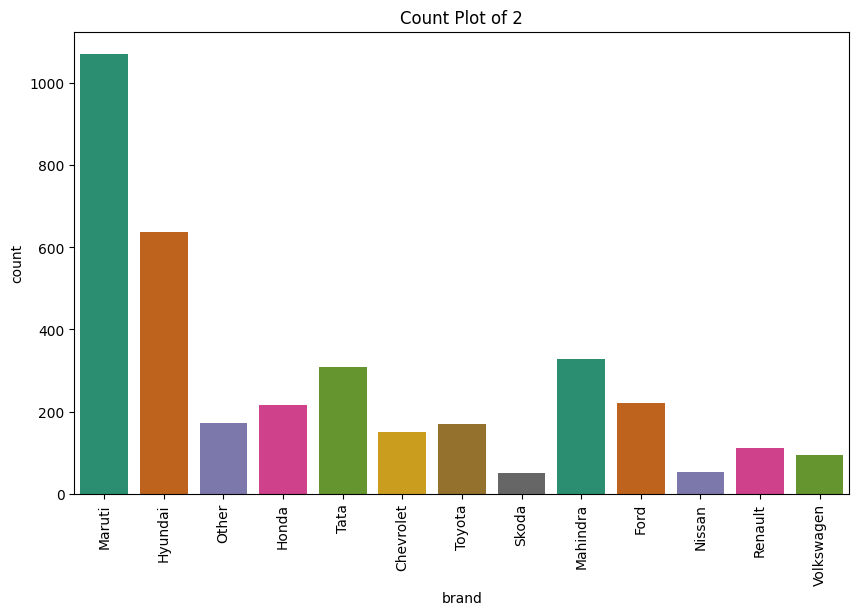

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='brand', palette='Dark2')  
plt.title(f'Count Plot of {i}')  
plt.xticks(rotation=90)  
plt.show()

**Maruti Suzuki is the most popular car brand, with almost twice the number of sales compared to the second-place brand, Hyundai.**

**There is a significant drop in sales between Maruti Suzuki and Hyundai, with the following brands having considerably fewer sales.**

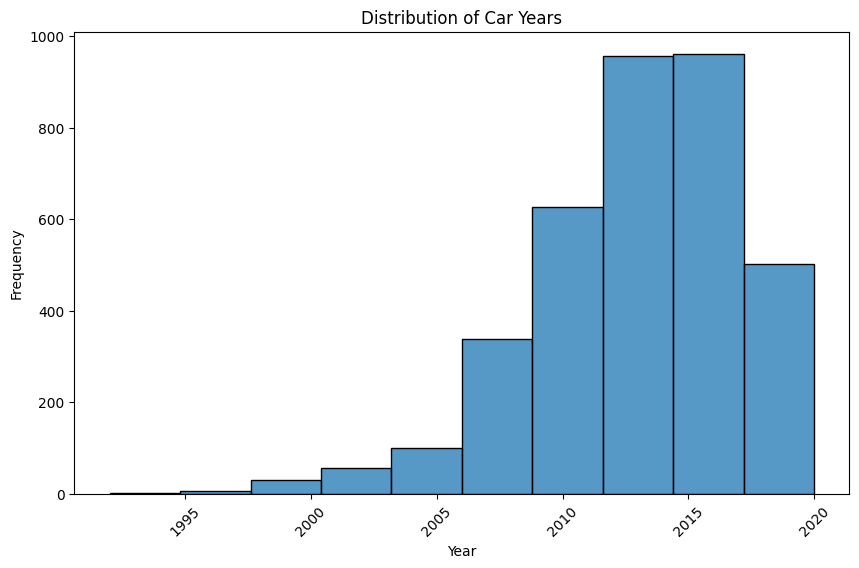

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=10, kde=False)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**The most frequent car model year is 2015. There are more cars from 2015 than any other year shown in the data set.**

**The distribution of car model years is skewed to the right. This means that there are more recent model year cars than older model year cars.**

**There are a few cars from before 2000. However, the number of cars steadily increases from 2000 to 2015.**

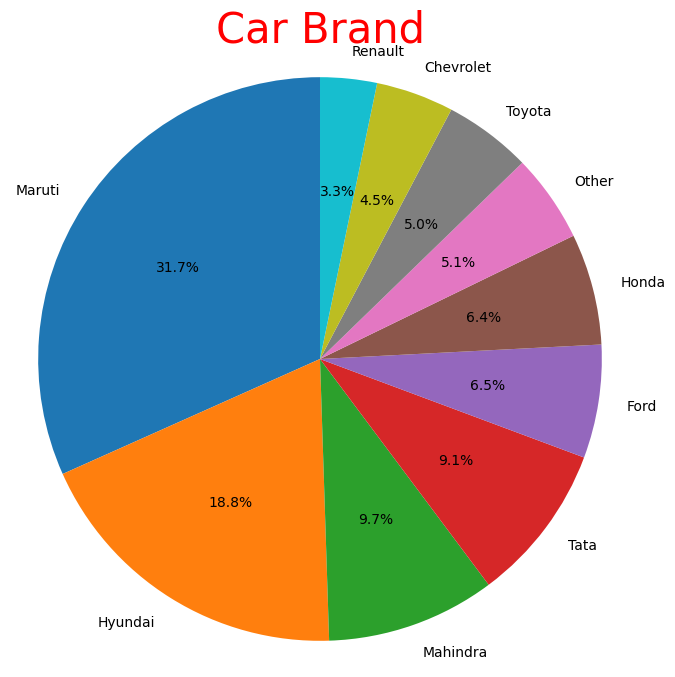

In [27]:
top_cars= df['brand'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_cars, labels=top_cars.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Car Brand', fontsize=30, color='red') 
plt.axis('equal')  
plt.show()

**The pie chart shows the distribution of car sales for different car brands.  The largest slice of the pie chart is Maruti, at 31.7%. This suggests that Maruti is the most popular car brand out of the ones listed. Other large slices of the pie chart include Hyundai (19.3%) and Mahindra (10.3%). Brands such as Renault and Chevrolet have a much smaller slice of the pie chart (1.2% and 0.9% respectively).**

**Here are some other insights you can draw from the pie chart:**
 - The top 5 car brands (Maruti, Hyundai, Mahindra, Tata, and Toyota) account for over 63% of the car sales.
 - There are a significant number of other car brands that are not listed in the chart but that collectively account for 13.8% of the sales.
 
 **Overall, the pie chart suggests that the car sales market is dominated by a few major brands.**

In [28]:
numerical_columns = df.select_dtypes(include='number')
corr = numerical_columns.corr()
corr

,year,km_driven,selling_price
year,1.00000,-0.417490,0.424260
km_driven,-0.41749,1.000000,-0.187359
selling_price,0.42426,-0.187359,1.000000


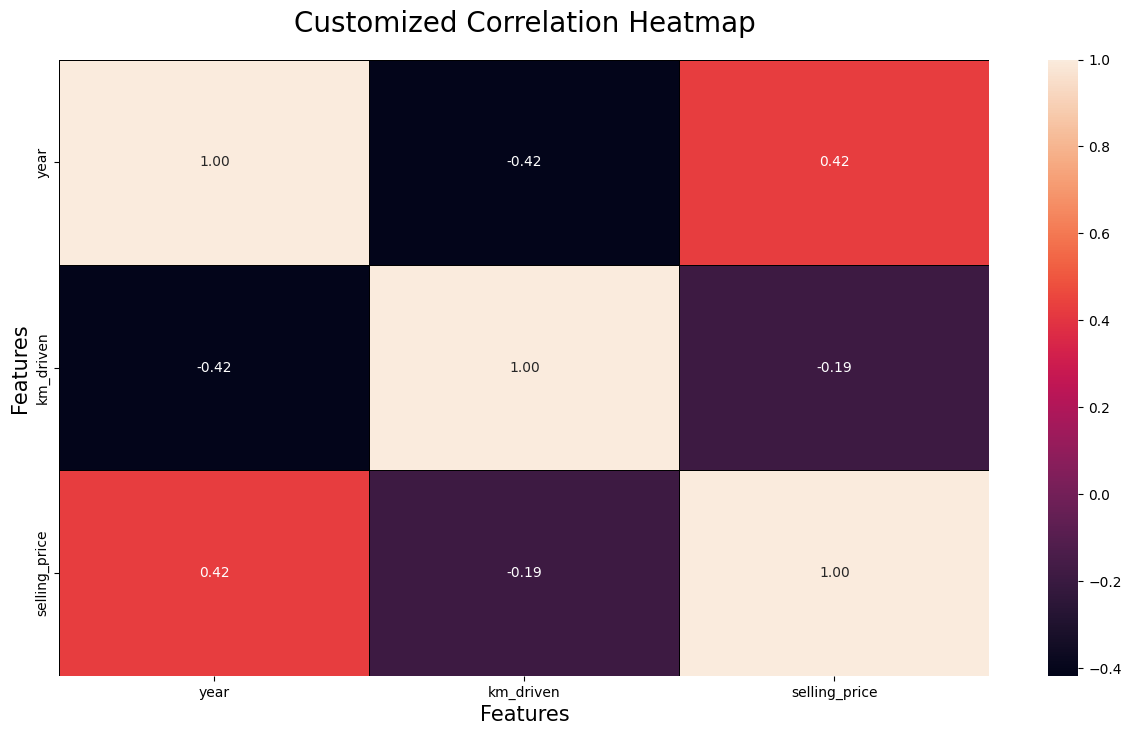

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True, fmt='.2f', cmap='rocket', linewidths=0.5, linecolor='black')
plt.title('Customized Correlation Heatmap', fontsize=20, pad=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

In [30]:
df.owner.value_counts()

owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

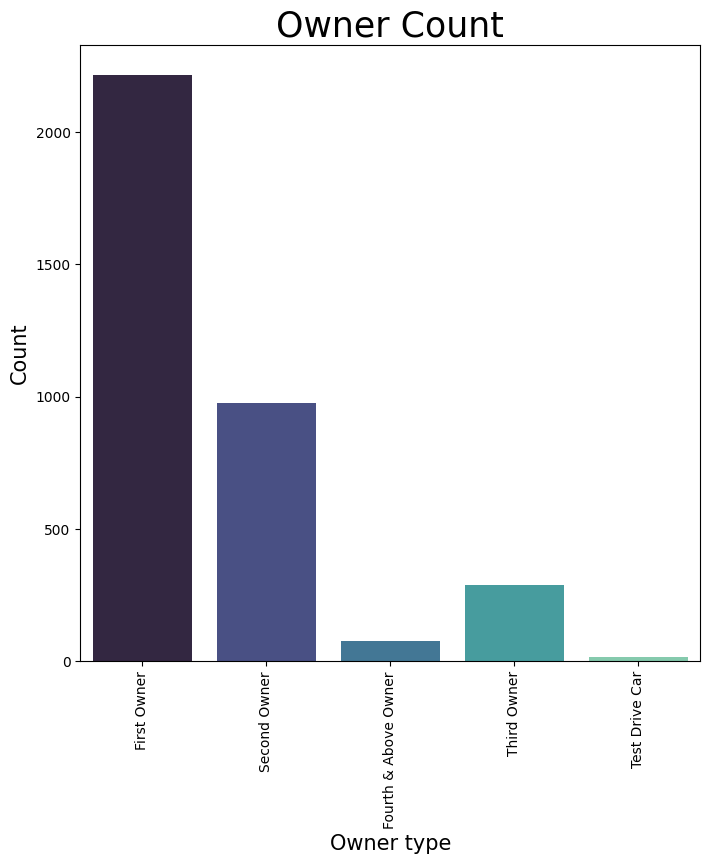

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x="owner",palette="mako")
plt.xticks(rotation=90)
plt.xlabel("Owner type",fontsize=15,color="black")
plt.ylabel("Count",fontsize=15,color="black")
plt.title("Owner Count",fontsize=25,color="black")
plt.show()

In [32]:
df.columns

Index(['brand', 'model', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price'],
      dtype='object')

In [33]:
df['transmission'].value_counts()

transmission
Manual       3265
Automatic     312
Name: count, dtype: int64

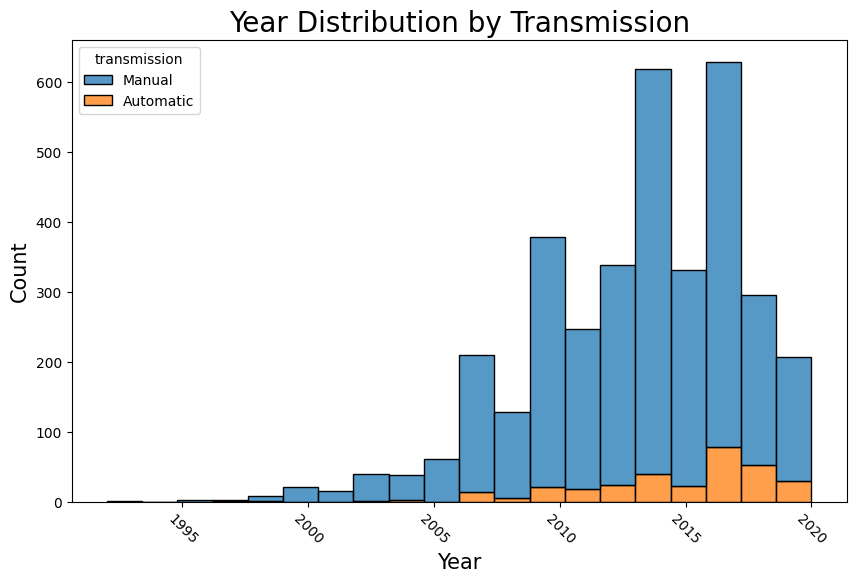

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', hue='transmission', multiple='stack', bins=20, kde=False)

# Set titles and labels
plt.title('Year Distribution by Transmission', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=-45)

# Show the plot
plt.show()

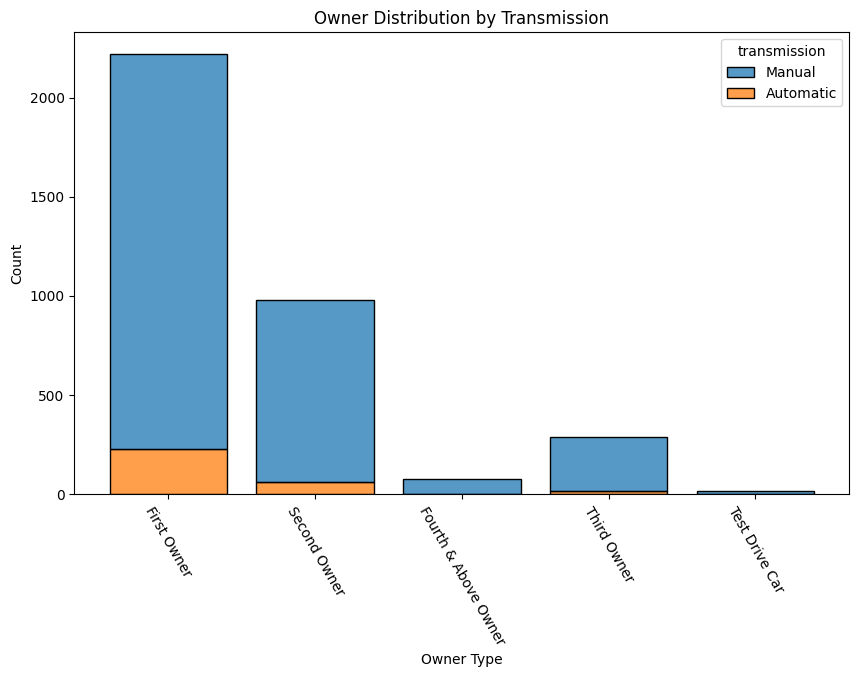

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='owner', hue='transmission', multiple='stack', shrink=0.8)
plt.title('Owner Distribution by Transmission')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.xticks(rotation=-60)
plt.show()

**There are 227 first-owner vehicles with automatic transmissions.**

**There are 1,991 first-owner vehicles with manual transmissions.**

**Among second-owner vehicles:**
 - 64 have automatic transmissions.
 - 914 have manual transmissions.
 
**Among third-owner vehicles:**
 - 2 have automatic transmissions.
 - 271 have manual transmissions.
 
**Test drive cars are negligible in number**

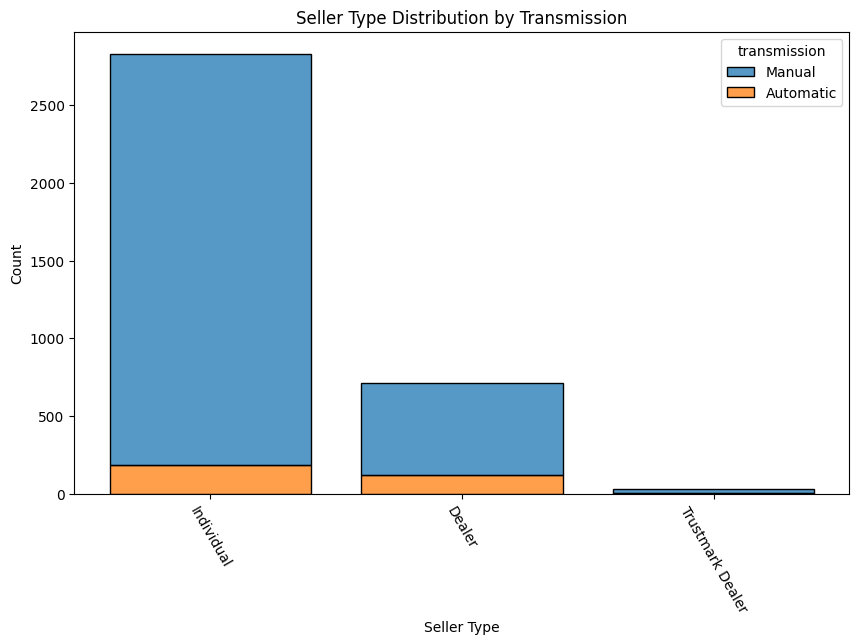

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='seller_type', hue='transmission', multiple='stack', shrink=0.8)
plt.title('Seller Type Distribution by Transmission')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.xticks(rotation=-60)
plt.show()

**A total of 2,832 cars were purchased directly by individuals, comprising 2,646 manual and 186 automatic vehicles.**

**A total of 712 cars were purchased by individuals through dealers, comprising 593 manual and 119 automatic vehicles.**

**A total of 33 cars were purchased by individuals through trustmark dealers, comprising 26 manual and 7 automatic vehicles.**

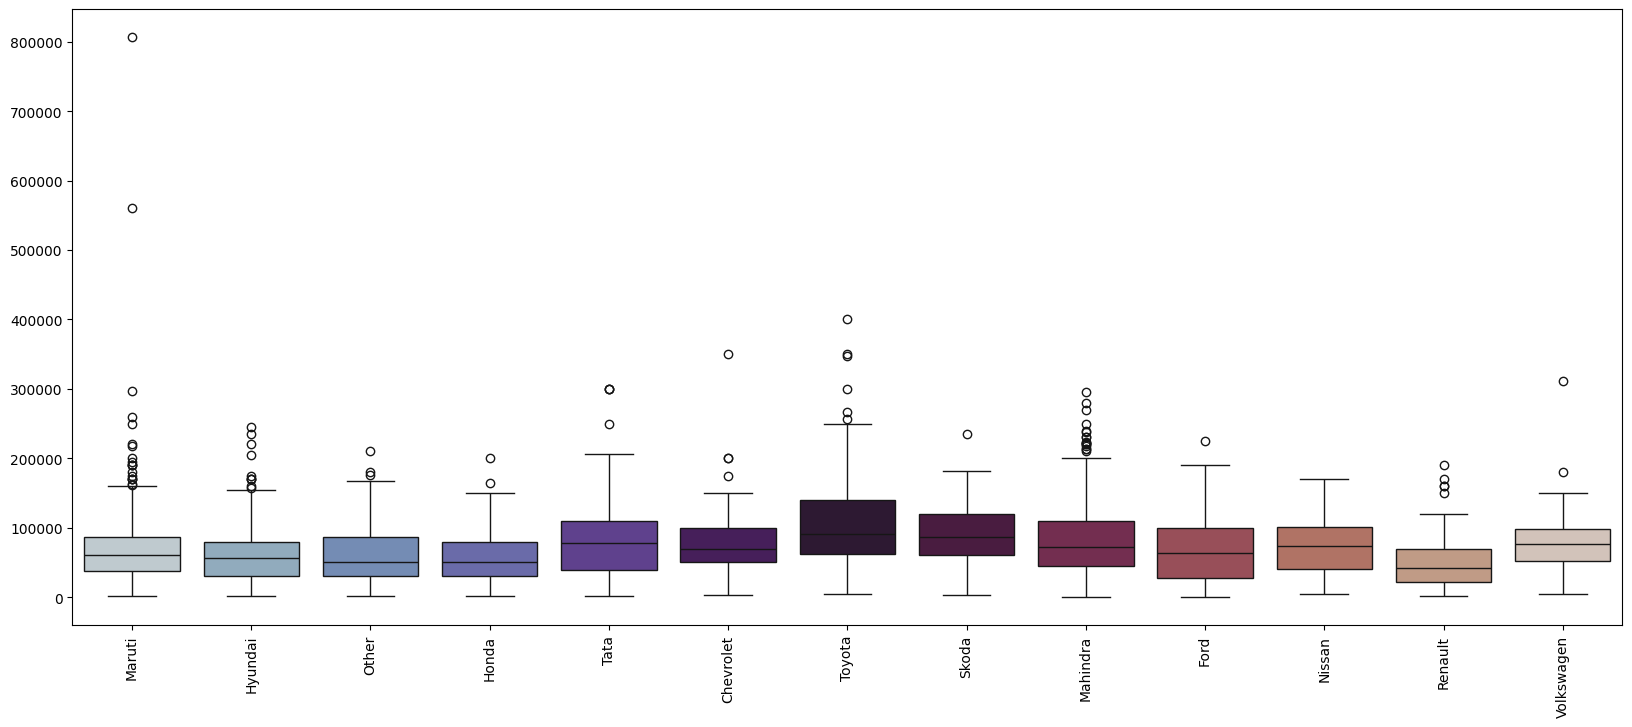

In [38]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df["brand"].values, y = df["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

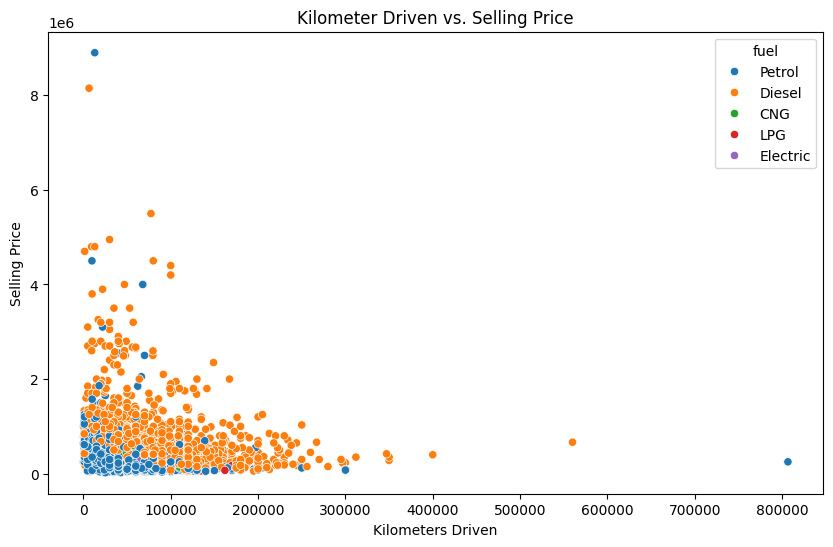

In [41]:
# Scatter Plot of km_driven vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel')
plt.title('Kilometer Driven vs. Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


**There is a negative correlation between Kilometer Driven and selling price:** As the mileage driven increases, the selling price tends to decrease. This suggests that cars with higher mileage tend to sell for lower prices.

In [42]:
df.head()

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Other,RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


## Outliers Detections

In [43]:
num_cols = df.dtypes[df.dtypes!='object'].index
num_cols

Index(['year', 'km_driven', 'selling_price'], dtype='object')

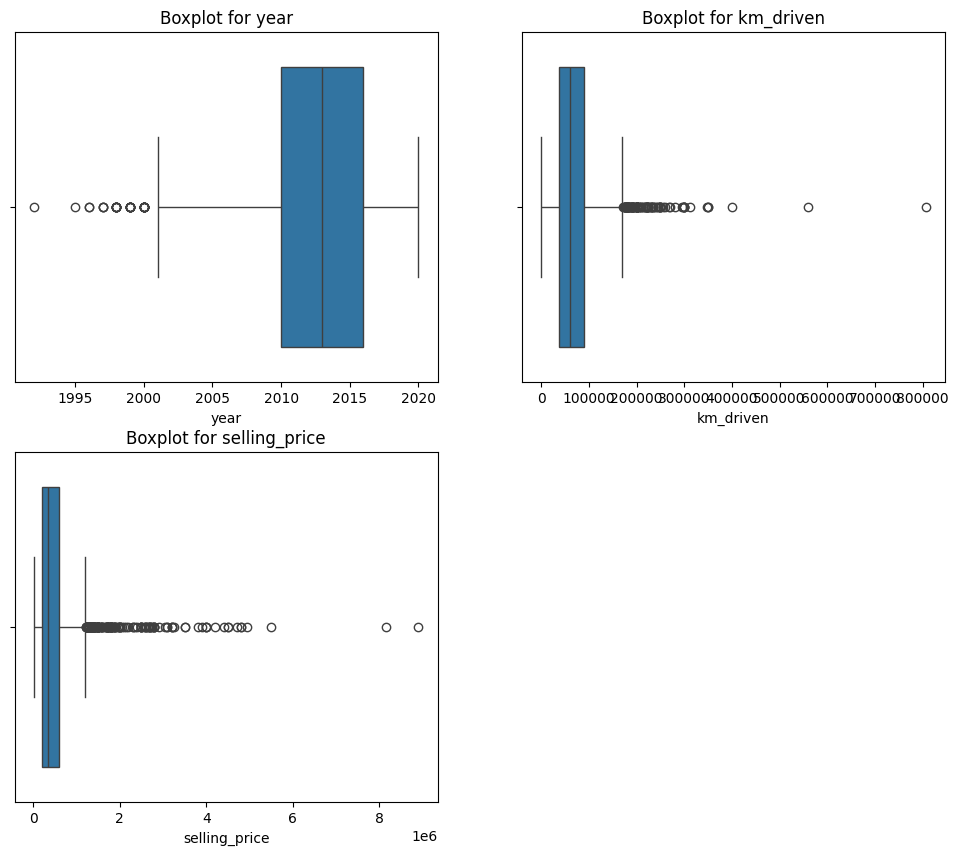

In [44]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

In [45]:
df1 = df
df1.shape

(3577, 9)

In [46]:
df1.head()

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Other,RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


#### Outlier Treatment - Cap

In [47]:
df1[num_cols].describe(percentiles=[0.01,0.05,0.25,0.75,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,97%,98%,99%,max
year,3577.0,2012.962538,4.251759,1992.0,2000.00,2005.0,2010.0,2013.0,2016.0,2019.0,2019.0,2019.0,2020.0,2020.0
km_driven,3577.0,69250.545709,47579.940016,1.0,1744.08,10000.0,36000.0,60000.0,90000.0,149534.8,170000.0,193440.0,223158.4,806599.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,51786.64,80000.0,200000.0,350000.0,600000.0,1200000.0,1497200.0,1800000.0,2675000.0,8900000.0


In [48]:
print(df1[df1['year']<2001.00].shape)
print(df1[df1['selling_price']>1200000.0].shape)
print(df1[df1['km_driven']>149534.8].shape)

(37, 9)
(170, 9)
(179, 9)


In [49]:
df1['year'] = np.where(df1['year']<2001.00 , 2001.00,df1['year'])
df1['selling_price'] = np.where(df1['selling_price']>1200000.0 , 1200000.0,df1['selling_price'])
df1['km_driven'] = np.where(df1['km_driven']>149534.8 , 149534.8,df1['km_driven'])

**To handle outliers in the 'year' column, we will cap the values, setting a lower bound of 2001.**

**For the 'Selling Price' column, we will cap outliers at the 95th percentile.**

**For the 'KM Driven' column, we will cap outliers at the 95th percentile.**

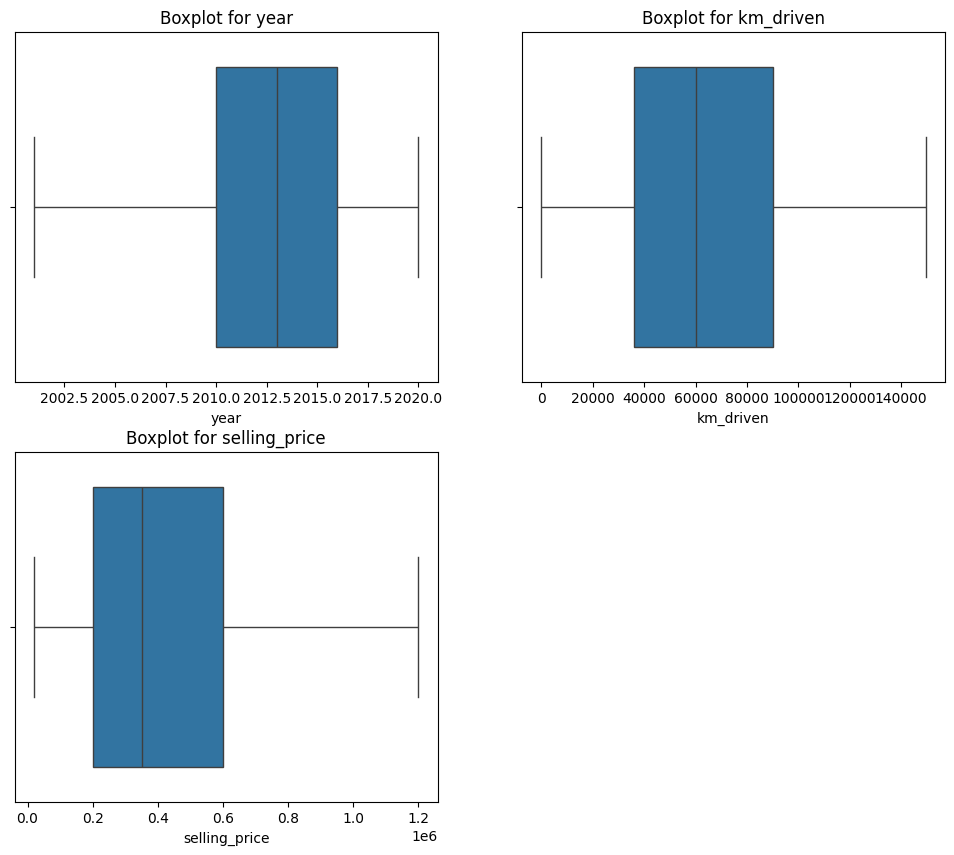

In [50]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

In [51]:
df1.head()

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007.0,70000.0,Petrol,Individual,Manual,First Owner,60000.0
1,Maruti,Wagon R LXI Minor,2007.0,50000.0,Petrol,Individual,Manual,First Owner,135000.0
2,Hyundai,Verna 1.6 SX,2012.0,100000.0,Diesel,Individual,Manual,First Owner,600000.0
3,Other,RediGO T Option,2017.0,46000.0,Petrol,Individual,Manual,First Owner,250000.0
4,Honda,Amaze VX i-DTEC,2014.0,141000.0,Diesel,Individual,Manual,Second Owner,450000.0


In [52]:
df1.drop('model', axis=1, inplace=True)

In [53]:
df1.to_csv("cleaned data.csv",index=False)

In [54]:
pd.read_csv('cleaned data.csv')

,brand,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,2007.0,70000.0,Petrol,Individual,Manual,First Owner,60000.0
1,Maruti,2007.0,50000.0,Petrol,Individual,Manual,First Owner,135000.0
2,Hyundai,2012.0,100000.0,Diesel,Individual,Manual,First Owner,600000.0
3,Other,2017.0,46000.0,Petrol,Individual,Manual,First Owner,250000.0
4,Honda,2014.0,141000.0,Diesel,Individual,Manual,Second Owner,450000.0
...,...,...,...,...,...,...,...,...
3572,Hyundai,2014.0,80000.0,Diesel,Individual,Manual,Second Owner,409999.0
3573,Hyundai,2014.0,80000.0,Diesel,Individual,Manual,Second Owner,409999.0
3574,Maruti,2009.0,83000.0,Petrol,Individual,Manual,Second Owner,110000.0
3575,Hyundai,2016.0,90000.0,Diesel,Individual,Manual,First Owner,865000.0
